# Soluções Númericas de Equações usando python

### Identificação :
Aluno : Yago David Pimenta - 800273


Professor : Wagner

#### Primeiro passo : Identificar qual função iremos utilizar

Eu deixei para o leitor modificar a função a ser usada manualmente , basta ir na def minha_funca(x) e colocar a função desejada . Nesse exemplo a função usada foi :

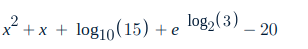

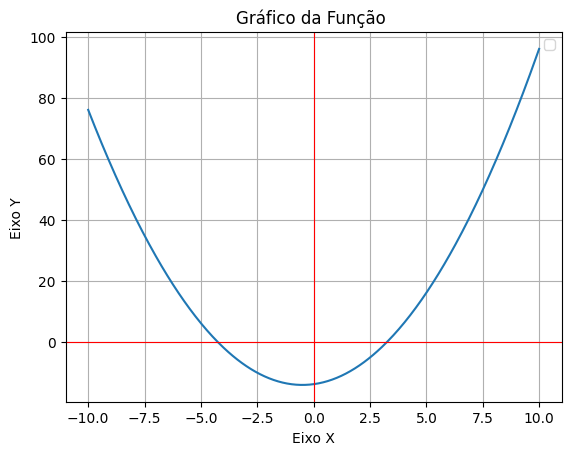

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Definindo a função matemática
def minha_funcao(x):
    return x**2 + 1*x  + math.log10(15) + math.e**math.log2(3)-20

# Gerando valores de x
x = np.linspace(-10, 10, 400)  # Gera 400 pontos entre -10 e 10

# Calculando os valores de y usando a função
y = minha_funcao(x)

# Criando o gráfico
plt.plot(x, y)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico da Função ')
plt.grid(True)

# Adicionando os eixos cartesianos
plt.axhline(0, color='red',linewidth=0.8)
plt.axvline(0, color='red',linewidth=0.8)

plt.legend()
plt.show()


#### Segundo passo : Método da bissecção

In [16]:


def metodo_bisseccao(a, b, Erro,tentativas_c,funcao_c):
    if minha_funcao(a) * minha_funcao(b) >= 0:
        print("A função deve ter sinais opostos nos pontos a e b. Reescreva os intervalos ")
        return None

    while (b - a) / 2 > Erro:
        c = (a + b) / 2
        tentativas_c.append(c)
        funcao_c.append(minha_funcao(c))
        if  minha_funcao(c) == 0:
            return c
        elif  minha_funcao(c) *  minha_funcao(a) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

# Intervalo inicial [a, b]
a = 1
b = 5

# Erro para a solução
Erro = 10**-6
tentativas_c = []
funcao_c = []

solucao = metodo_bisseccao(a, b, Erro,tentativas_c,funcao_c)
if solucao is not None:
    print("Aproximação da solução:", solucao)
else:
    print("Não foi possível encontrar uma solução no intervalo dado.")
print(f"Foram necessárias {len(tentativas_c)} iterações ")

Aproximação da solução: 3.2675981521606445
Foram necessárias 21 iterações 


Para fins de visualização irei printar os 20 valores intermediarios

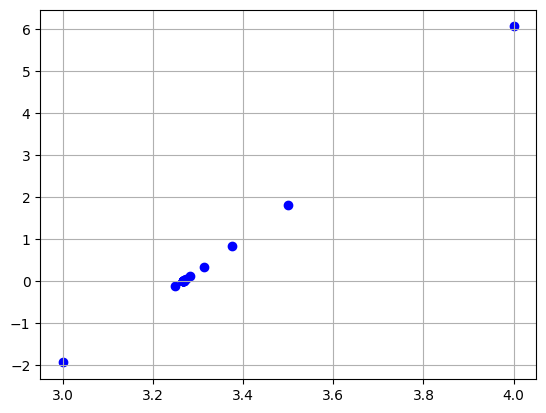

In [17]:
plt.scatter(tentativas_c, funcao_c, color='blue', marker='o', label='Pontos intermedários até chegar ao resultado final')
plt.grid(True)
plt.show()

Não deu para enxergar direito , então irei dar um zoom nos pontos próximos da solução

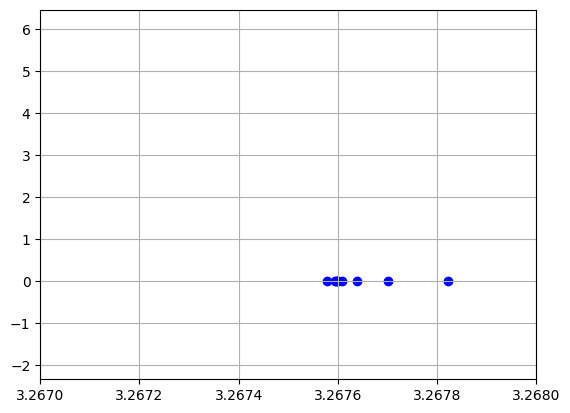

In [18]:
plt.scatter(tentativas_c, funcao_c, color='blue', marker='o', label='Pontos intermedários até chegar ao resultado final')
plt.grid(True)
plt.xlim(3.267, 3.268)
plt.show()

Printando a raiz diferente

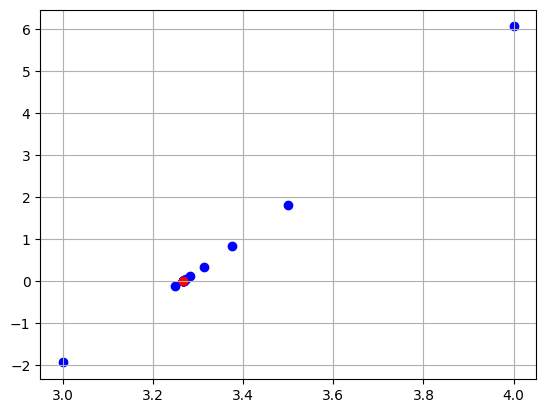

In [19]:
plt.scatter(tentativas_c, funcao_c, color='blue', marker='o', label='Pontos intermedários até chegar ao resultado final')
plt.grid(True)

x_destaque = 3.2675981521606445
y_destaque = 0
plt.scatter(x_destaque, y_destaque, color='red', marker='o', label='Ponto Destacado')
plt.show()


#### Terceiro passo : Método de Newton

Precisamos calcular a derivada então :

In [20]:
import sympy as sp

# Defina a variável simbólica
x = sp.Symbol('x')
funcao_simbolica = minha_funcao(x)
derivada = sp.diff(funcao_simbolica, x)
print(derivada)

2*x + 1


Agora irei passar para o método de newton

In [21]:




def metodo_newton(aprox_inicial, erro, max_iter):
    x_atual = aprox_inicial

    for i in range(max_iter):
        f_x_atual = minha_funcao(x_atual)
        f_prime_x_atual= derivada.subs(x, x_atual)


        if abs(f_prime_x_atual) < 1e-10:
            print("A derivada está próxima de zero. O método não pode continuar.")
            return None

        x_proximo = x_atual - f_x_atual / f_prime_x_atual

        if abs(x_proximo - x_atual) < erro:
            return x_proximo

        x_atual = x_proximo

    print("O método não convergiu após", max_iter, "iterações.")
    return None

# Aproximação inicial
aprox_inicial = 1.5

# Tolerância para a solução
erro = 10**-6

# Número máximo de iterações
max_iter = 5

solucao1 = metodo_newton(aprox_inicial, erro, max_iter)
if solucao1 is not None:
    print("Aproximação da solução:", solucao1)


Aproximação da solução: 3.26759874839519


### Conclusões :

Primeiro vamos comparar a solução final das duas soluções :

In [23]:
Erro_final = abs(solucao-solucao1)
print("A diferença em modulo dos dois métodos foi de ",Erro_final)

A diferença em modulo dos dois métodos foi de  5.96234541738738e-7


Lembrando sempre que o método de newton precisaram de apenas 5 interações para chegar nesse valor , enquanto o método da bissecção foram necessárias 21 interações .

## Roteiro para adaptar esse algoritmo para outras funções :



*   Na primeira célula , cabe ao leitor ir na "def minha_funcao()" e alterar no return e adicionar a função desejada , lembrando que para funções especiais tal como trigonométricas , logaritimicas etc ... Cabe ao leitor usar math.(nome da funcao) .
*   Ainda na primeira célula , eu defini o domínio máximo para ir de -10 e 10 , caso queira alterar deve ir na seguinte linha : x = np.linspace(-10, 10, 400)  e alterar o domínio e se quiser a quantidade de pontos gerados .

*   Logo em seguida deve-se executar essa célula e visualizar o gráfico dela , após isso , na próxima célula , cabe ao leitor ajustar o intervalo correto [a,b] tendo em vista que englobem uma raíz , para que o método de certo . O leitor também pode ajustar o erro máximo , nesse caso eu deixei para ser 10⁻6
*   Já as próximas três células  foram plotando gráficos , a costumização fica a critério do leitor , recomendo olhar a documentação do matplotlib.pyplot
*   No método de newton cabe ao leitor ajustar o erro , o x0 que foi chamado de aprox_inicial e o mais importante . A quantidade mínima de interações foram definidas para serem feitas de forma manual , cabe ao leitor manualmente encontrar o menor valor possível de interações correspondente ao erro máximo desejado .

